<a href="https://colab.research.google.com/github/desrocs/ClassMetotDemo/blob/master/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving sikayet_semi.csv to sikayet_semi.csv


In [ ]:
path = "sikayet_semi.csv"
df = pd.read_csv(path, sep='|', encoding="utf8")

In [ ]:
df

,id,baslik,metin,tarih,kullanici,nitelikler
0,16734472,Türk Telekom İndirim Taahhüdü Adı Altında Haks...,Türk Telekom mobil ana taahhüdüm 26/10/2020 ta...,2020-12-09,Hakan,0
1,16734238,Türk Telekom İnternet Naklimi Hala Tamamlamadılar,30 kasımda yaptığım başvuru sonucunda randevu ...,2020-12-09,Mehmet,0
2,16722785,Türk Telekom Ev Telefonu Çalışmıyor,İzmir Çeşme Ilıca'dan yazıyorum. 48 saattir ev...,2020-12-08,Ahmet,1
3,16734455,Türk Telekom Sebepsiz Yere İnternetim Gidiyor,Yaklaşık 13 belki daha fazla senedir Türk Tele...,2020-12-09,Emir,1
4,16734396,Türk Telekom Fatura Ödemesi İle İlgili,Türk Telekom hattımı 3 Aralık'ta ödediğim hald...,2020-12-09,Selcuk,0
...,...,...,...,...,...,...
5995,16542994,Türk Telekom'da Evde İnternetimin Açılmaması,Türk Telekom evde internet abonesiyim Aydın’a ...,2020-11-22,Ahmet,0
5996,16542923,Türk Telekom Altyapı Döşemek İçin Çırpınan Kur...,Türk Telekom altyapı sorunları ile boğuşuyoruz...,2020-11-22,Semih,1
5997,16542920,Türk Telekom İnternet Bağlantısında Sıkıntı Çe...,38 gündür internetim şirketin müşteri temsilci...,2020-11-22,Yalçın,1
5998,16542900,Türk Telekom Nakil İşlemi Hakkında,Sayın Türk Telekom ailesi3 ay oldu halen nakil...,2020-11-22,Mesut,0


In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.drop(["baslik","metin","kullanici","nitelikler"],axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6000 non-null   int64 
 1   tarih   6000 non-null   object
dtypes: int64(1), object(1)
memory usage: 93.9+ KB


In [ ]:
df2.rename(columns={"tarih":"date","id":"complaint"},inplace= True)

In [ ]:
df2

,complaint,date
0,16734472,2020-12-09
1,16734238,2020-12-09
2,16722785,2020-12-08
3,16734455,2020-12-09
4,16734396,2020-12-09
...,...,...
5995,16542994,2020-11-22
5996,16542923,2020-11-22
5997,16542920,2020-11-22
5998,16542900,2020-11-22


In [ ]:
df2 = df2.reindex(columns=["date","complaint"])

In [ ]:
df2

,date,complaint
0,2020-12-09,16734472
1,2020-12-09,16734238
2,2020-12-08,16722785
3,2020-12-09,16734455
4,2020-12-09,16734396
...,...,...
5995,2020-11-22,16542994
5996,2020-11-22,16542923
5997,2020-11-22,16542920
5998,2020-11-22,16542900


In [ ]:
df2['date'] = pd.to_datetime(df2['date'], errors='coerce',infer_datetime_format=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6000 non-null   datetime64[ns]
 1   complaint  6000 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 93.9 KB


In [ ]:
df3 = df2.groupby(["date"])[["complaint"]].count().reset_index()

In [ ]:
df3

,date,complaint
0,2020-11-10,3
1,2020-11-17,1
2,2020-11-18,1
3,2020-11-20,1
4,2020-11-21,1
5,2020-11-22,220
6,2020-11-23,310
7,2020-11-24,288
8,2020-11-25,304
9,2020-11-26,290


In [ ]:
df3.info()

(array([737738., 737742., 737746., 737750., 737754., 737758., 737760.,
        737764., 737768.]), <a list of 9 Text major ticklabel objects>)

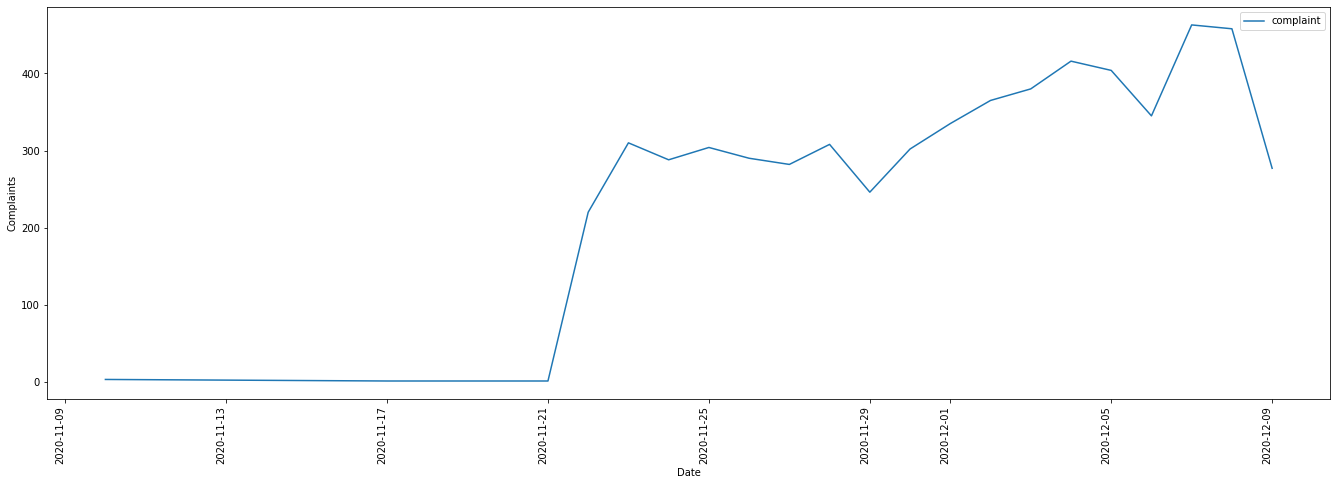

In [ ]:
df3.plot(x="date",figsize=(23, 8))
plt.xlabel('Date')
plt.ylabel('Complaints')
plt.xticks(rotation = 90)


In [ ]:
#Determine rolling statistics
rolmean = df3.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df3.rolling(window=12).std()
print(rolmean,rolstd)

     complaint
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  167.416667
12  187.666667
13  212.750000
14  240.583333
15  270.916667
16  302.500000
17  318.833333
18  326.666667
19  331.416667
20  344.666667
21  358.666667
22  358.250000      complaint
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11  148.330380
12  140.208503
13  130.356243
14  115.888236
15   92.818942
16   44.561500
17   47.403171
18   53.220525
19   51.985065
20   63.376700
21   68.547705
22   69.069300


In [ ]:
orig = plt.plot(df3, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

AttributeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f37b7b3b8c0> (for post_execute):


ValueError: ignored

ValueError: ignored